In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
warnings.filterwarnings('ignore')

In [51]:
data=pd.read_csv("wine.csv")

In [52]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [53]:
df=pd.DataFrame(df)

In [54]:
df.shape

(1599, 12)

In [55]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   pH                    1599 non-null   float64
 7   sulphates             1599 non-null   float64
 8   alcohol               1599 non-null   float64
 9   quality               1599 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.0 KB


In [56]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

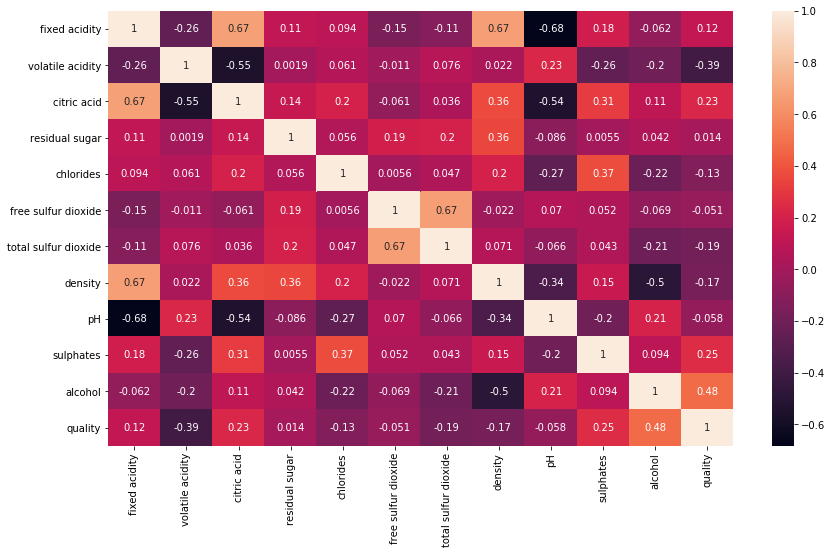

In [57]:
correlation=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True)

Correlation is very weak between quality and two input variable free sulfer dioxide  & residual sugar 

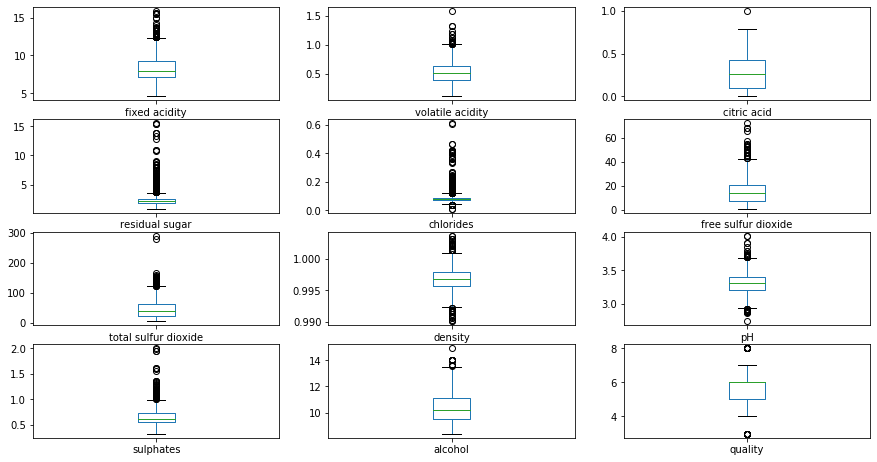

In [58]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(15,10))
plt.show()

In [ ]:
There are outliers visible in above box plot.

In [59]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

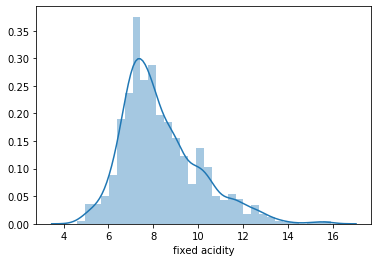

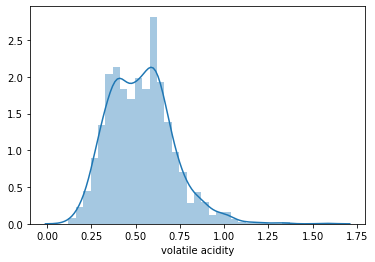

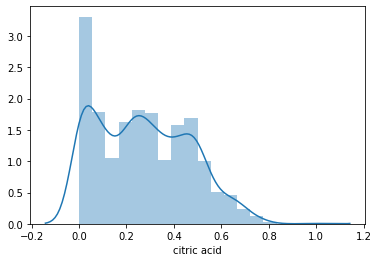

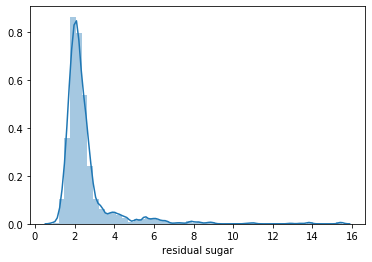

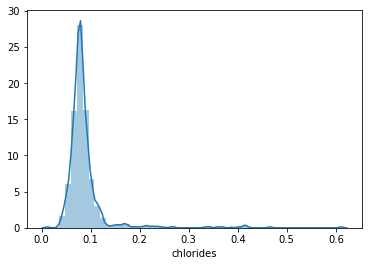

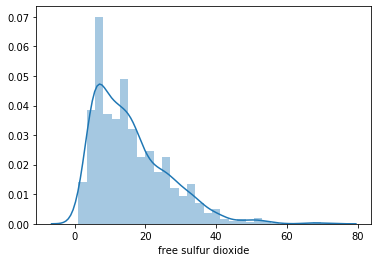

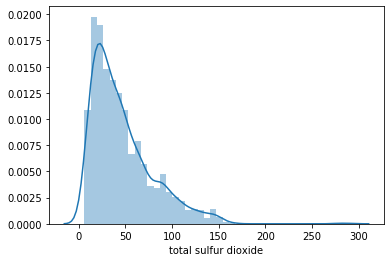

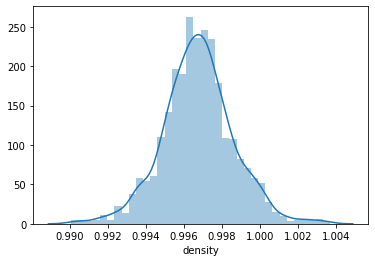

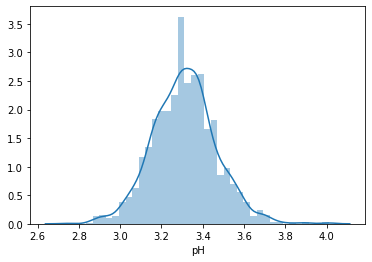

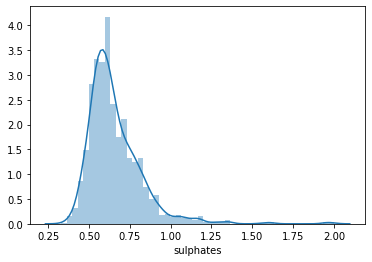

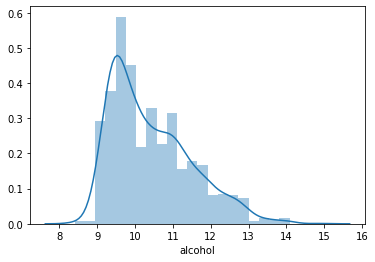

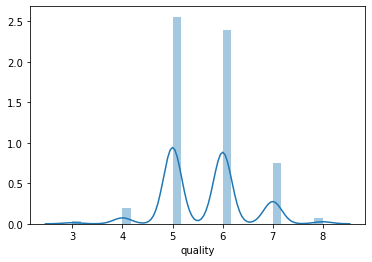

In [60]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [81]:
drop=pd.DataFrame([[0.013732,"residual sugar","No","alot"],[-0.050656,"free sulfer dioxide","No","alot"]],columns=["Correlation with target","Column name","Normalized","Outliers"])
drop

,Correlation with target,Column name,Normalized,Outliers
0,0.013732,residual sugar,No,alot
1,-0.050656,free sulfer dioxide,No,alot


we are setting threshold of correlation +/- 0.1. So above two columns are weekly correlated with output variable,hence we drop it.

In [82]:
df=df.drop(['residual sugar','free sulfur dioxide'],axis=1)

In [83]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1599, 10)

In [84]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))


In [91]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 10)
(1484, 10)


we remove outliers and skewness

In [92]:
features = ['volatile acidity','citric acid','sulphates','alcohol','fixed acidity','chlorides','total sulfur dioxide','density','pH']
x = df_new[features]

In [97]:
y = df_new['quality'].apply(lambda y_data: 1 if y_data>=7 else 0)

Here we re-classified data set on basis of quality. As quality value less than 7 as '0'(bad) and greater than 7 as '1'(good)

In [98]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [99]:
x.shape

(1484, 9)

In [100]:
y.shape

(1484,)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3,test_size = 0.25)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [140]:
lr=LogisticRegression()

In [141]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print("Best accuracy is ",maxr2," on Random_state ",maxRS)

Best accuracy is  0.9170403587443946  on Random_state  96


In [142]:
model=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score of ", m , "is:")
    print(accuracy_score(y_test,predm))

accuracy score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.8789237668161435
accuracy score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.874439461883408
accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=No

In [143]:
from sklearn.model_selection import cross_val_score
model=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),LogisticRegression()]
for i in model:
    score=cross_val_score(i,x,y,cv=5)
    print("score of ", i , "is:")
    print(score)
    print(score.mean())

score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
[0.87205387 0.82154882 0.88552189 0.7979798  0.87162162]
0.8497451997451998
score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
[0.86195286 0.7979798  0.87542088 0.80808081 0.80743243]
0.8301733551733552
score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, m

SVC model we choose svc dataset as it has lowest difference in Accuracy score and Cross val score

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameters={'kernel':['Linear','rbf'],'C':[1,1000]}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

0.8746587496587497
{'C': 1, 'kernel': 'rbf'}


In [146]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsv=lr.predict(x_test)
print(accuracy_score(y_test,predsv))

0.8923766816143498


In [147]:
joblib.dump(svc,'redwine.obj') #dumping the value

['redwine.obj']

In [138]:
rwine=joblib.load('redwine.obj') #loading the value
rwine.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,